# Testing loading afterpulse

This notebook will be for testing if afterpulse files can easily be loaded through the `load_mpl_inline` framework

In [1]:
import xarray as xr
import numpy as np
import os

import matplotlib.pyplot as plt

import mplgz_to_ingested.load as load
import mplgz_to_ingested.raw_to_ingested as raw_to_ingested

In [16]:
dir_afterpulse = '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw'
fname_afterpulse = '202211301424.mpl.gz'

fname = os.path.join(dir_afterpulse, fname_afterpulse)

In [17]:
ds = load.load_mpl_inline(fname)

In [18]:
ds

<xarray.Dataset>
Dimensions:                      (profile: 428, range: 1999)
Dimensions without coordinates: profile, range
Data variables: (12/52)
    unit                         (profile) float32 108.0 108.0 ... 108.0 108.0
    version                      (profile) float32 413.0 413.0 ... 413.0 413.0
    shots_sum                    (profile) float64 1.25e+04 ... 1.25e+04
    trigger_frequency            (profile) float64 2.5e+03 2.5e+03 ... 2.5e+03
    energy_monitor               (profile) float64 4.62e+03 ... 4.534e+03
    temp_0                       (profile) float64 1.407e+03 ... 1.408e+03
    ...                           ...
    channel_2                    (profile, range) float32 0.0 0.0 ... 0.0016 0.0
    time_utc                     (profile) object '2022-11-30T14:24:21' ... '...
    time                         (profile) datetime64[ns] 2022-11-30T14:24:21...
    c                            float64 2.998e+08
    nrb_copol                    (profile, range) float64 -7.065e-09 ... -0.1167
    nrb_crosspol                 (profile, range) float64 -6.655e-09 ... 0.5434
Attributes:
    created:   2023-02-23T:13:59:39Z
    software:  mpl2nc (https://github.com/peterkuma/mpl2nc)
    version:   1.3.5

202211301424.mpl.gz


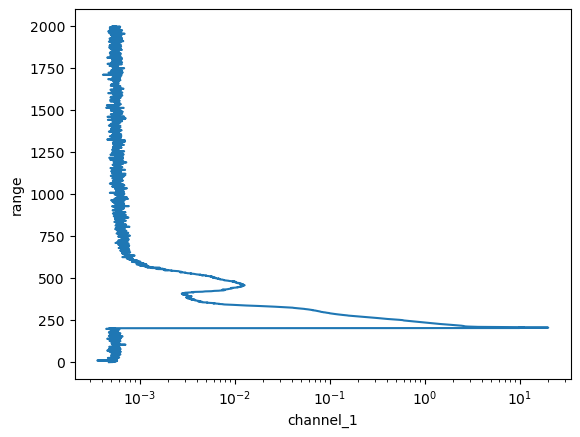

In [19]:
ds.channel_1.mean(dim='profile').plot(y='range',xscale='log')#,hue='profile')
print(fname_afterpulse)

202211301414.mpl.gz


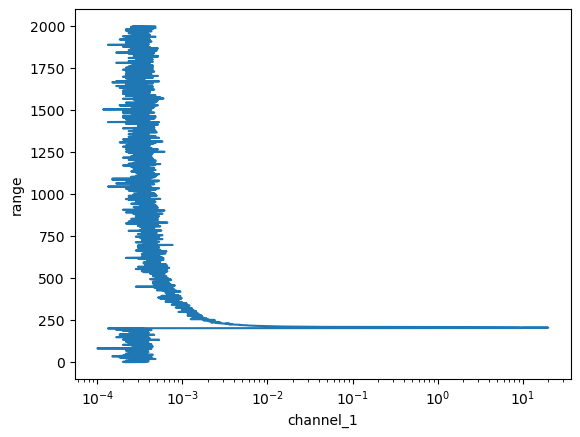

In [15]:
ds.channel_1.mean(dim='profile').plot(y='range',xscale='log')#,hue='profile')
print(fname_afterpulse)

202211301405.mpl.gz


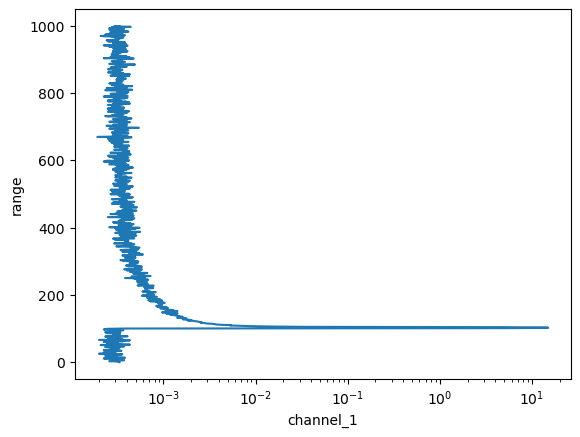

In [11]:
ds.channel_1.mean(dim='profile').plot(y='range',xscale='log')#,hue='profile')
print(fname_afterpulse)

In [11]:
ds_ing = raw_to_ingested.raw_to_ingested(None, None, data_loaded=ds)
ds_ing

<xarray.Dataset>
Dimensions:          (time: 22, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2019-07-11T12:42:05 ... 2019-07-11...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] 2019-07-11T12:42:05
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:30 ... 00:10:30
    hour             (time) float32 12.7 12.71 12.72 12.73 ... 12.86 12.87 12.88
    nshots           (time) int32 75000 75000 75000 75000 ... 75000 75000 75000
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 5.35 5.348 5.348 5.347 ... 5.4 5.402 5.404
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.0002667 0.0005333 ... 0.0002667
    backscatter_2    (time, height) float32 0.0 0.0 0.0 ... 0.0002667 0.0
    lat              float32 72.6
    lon              float32 -38.42
    alt              float32 3.2e+03
Attributes:
    Date_created:              2023-02-17T15:41:50 UTC
    Ingest_version:            Id: mpl/raw_to_ingested.py ,v 0.1 2023/02/14 
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

In [12]:
afterpulse_1 = ds_ing.backscatter_1.mean(dim='time')
afterpulse_2 = ds_ing.backscatter_2.mean(dim='time')

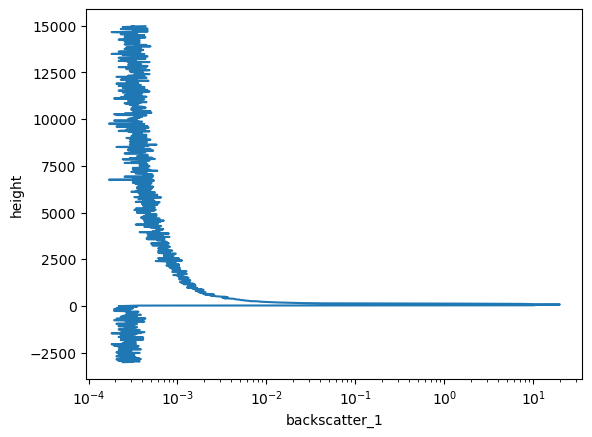

In [13]:
afterpulse_1.plot(y='height',xscale='log')

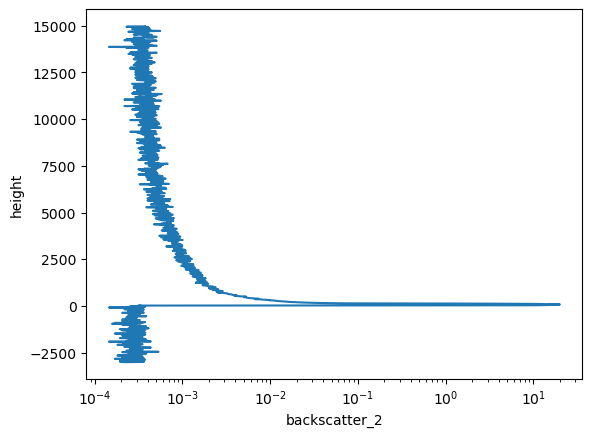

In [14]:
afterpulse_2.plot(y='height',xscale='log')

In [15]:
ds_new = xr.Dataset()
ds_new['afterpulse_1'] = afterpulse_1
ds_new['afterpulse_2'] = afterpulse_2

ds_new

<xarray.Dataset>
Dimensions:       (height: 1200)
Coordinates:
  * height        (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables:
    afterpulse_1  (height) float32 0.0002424 0.0003152 ... 0.000303 0.0004364
    afterpulse_2  (height) float32 0.0002182 0.0003636 ... 0.0003636 0.0003758

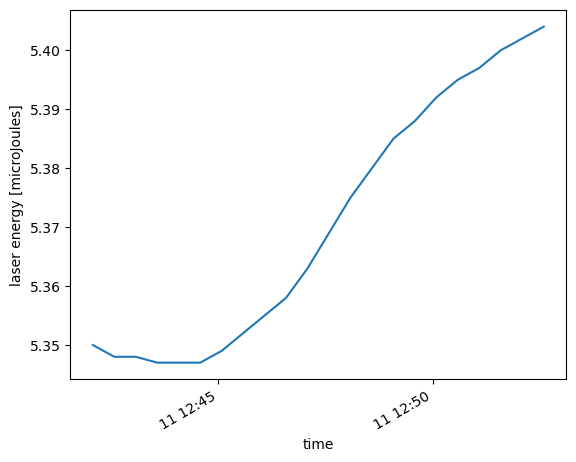

In [16]:
ds_ing.energy.plot()

In [17]:
# energy correction for the afterpulse signals
E0 = ds_ing.energy.values[0]

E_ratio = ds_ing.energy / E0

aft1 = (ds_ing.backscatter_1 * E_ratio).sum(dim='time') / E_ratio.sum()
aft2 = (ds_ing.backscatter_2 * E_ratio).sum(dim='time') / E_ratio.sum()

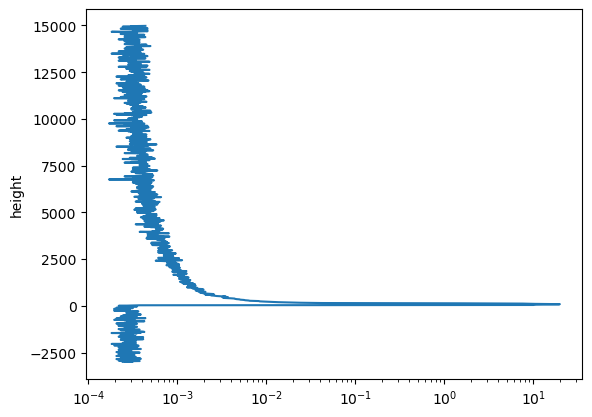

In [18]:
aft1.plot(y='height',xscale='log')

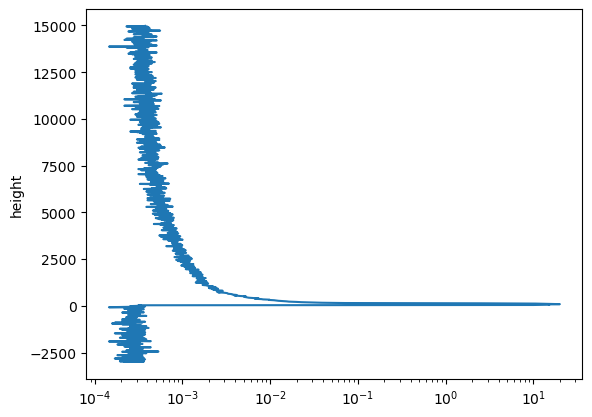

In [19]:
aft2.plot(y='height',xscale='log')

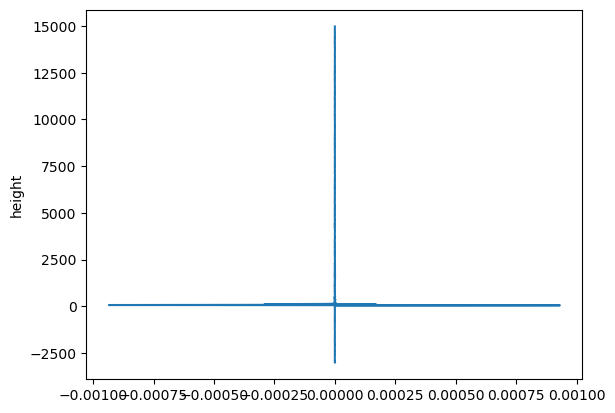

In [20]:
(aft1 - afterpulse_1).plot(y='height')